# Lesson 4.张量的线性代数运算

即BLAS和LAPACK模块的相关运算。

In [1]:
import torch
import numpy as np

## 一、BLAS和LAPACK概览

&emsp;&emsp;BLAS（Basic Linear Algeria Subprograms）和LAPACK（Linear Algeria Package）模块提供了完整的线性代数基本方法，包括：
- 矩阵的形变及特殊矩阵的构造方法：包括矩阵的转置、对角矩阵的创建、单位矩阵的创建、上/下三角矩阵的创建等；
- 矩阵的基本运算：包括矩阵乘法、向量内积、矩阵和向量的乘法等，当然，此处还包含了高维张量的基本运算，将着重探讨矩阵的基本运算拓展至三维张量中的基本方法；
- 矩阵的线性代数运算：包括矩阵的迹、矩阵的秩、逆矩阵的求解、伴随矩阵和广义逆矩阵等；
- 矩阵分解运算：特征分解、奇异值分解和SVD分解等。

## 二、矩阵的形变及特殊矩阵构造方法

矩阵的形变方法其实也就是二维张量的形变方法

**<center>Tensor矩阵运算</center>**
|**函数**|**描述**|
| :------:| :------: |
| torch.t(t)        | t转置| 
| torch.eye(n)       | 创建包含n个分量的单位矩阵 | 
| torch.diag(t1)        | 以t1中各元素，创建对角矩阵 | 
| torch.triu(t)        | 取矩阵t中的上三角矩阵 | 
| torch.tril(t)        | 取矩阵t中的下三角矩

In [2]:
#创建一个2*3的矩阵
t1 = torch.arange(1, 7).reshape(2, 3).float()
t1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [3]:
torch.t(t1)  # 转置

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [8]:
t = torch.arange(5)
torch.diag(t)

tensor([[0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 0, 0, 3, 0],
        [0, 0, 0, 0, 4]])

In [10]:
# 对角线向上偏移一位
torch.diag(t, 1)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 4],
        [0, 0, 0, 0, 0, 0]])

In [9]:
# 对角线向下偏移一位
torch.diag(t, -1)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0],
        [0, 0, 0, 3, 0, 0],
        [0, 0, 0, 0, 4, 0]])

In [5]:
torch.tril(t1)

tensor([[1., 0., 0.],
        [4., 5., 0.]])

In [11]:
t1 = torch.arange(9).reshape(3, 3)
t1

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [12]:
# 取上三角矩阵
torch.triu(t1)

tensor([[0, 1, 2],
        [0, 4, 5],
        [0, 0, 8]])

In [13]:
# 上三角矩阵向左下偏移一位
torch.triu(t1, -1)

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 7, 8]])

In [14]:
# 上三角矩阵向右上偏移一位
torch.triu(t1, 1)

tensor([[0, 1, 2],
        [0, 0, 5],
        [0, 0, 0]])

## 三、矩阵的基本运算

**<center>矩阵的基本运算</center>**
|**函数**|**描述**|
| :------:| :------: |
| torch.dot(t1, t2)        | 计算t1、t2张量内积 | 
| torch.mm(t1, t2)        | 矩阵乘法 | 
| torch.mv(t1, t2)        | 矩阵乘向量 | 
| torch.bmm(t1, t2)        | 批量矩阵乘法 | 
| torch.addmm(t, t1, t2)        | 矩阵相乘后相加 | 
| torch.addbmm(t, t1, t2)        | 批量矩阵相乘后相加 | 


注意，在PyTorch中，dot和vdot只能作用于一维张量，且对于数值型对象，二者计算结果并没有区别，两种函数只在进行复数运算时会有区别。

In [15]:
t = torch.arange(1, 4)
t

tensor([1, 2, 3])

In [16]:
torch.dot(t, t)

tensor(14)

In [17]:
torch.vdot(t, t)

tensor(14)

- mm：矩阵乘法
  

In [18]:
t1 = torch.arange(1, 7).reshape(2, 3)
t1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [19]:
t2 = torch.arange(1, 10).reshape(3, 3)
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [20]:
# 对应位置元素相乘
t1 * t1

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [21]:
# 矩阵乘法
torch.mm(t1, t2)

tensor([[30, 36, 42],
        [66, 81, 96]])

![5](https://i.loli.net/2021/01/14/gshVBOWM4QD2TiL.jpg)

- mv：矩阵和向量相乘      
&emsp;&emsp;矩阵和向量相乘的过程我们可以看成是先将向量转化为列向量然后再相乘。

In [22]:
met = torch.arange(1, 7).reshape(2, 3)
met

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
vec = torch.arange(1, 4)
vec

tensor([1, 2, 3])

在实际执行向量和矩阵相乘的过程中，需要矩阵的列数和向量的元素个数相同

In [25]:
torch.mv(met, vec)

# met中的每一个向量单独和vec做内积

tensor([14, 32])

In [27]:
torch.mm(met, vec.reshape(3, 1))

tensor([[14],
        [32]])

- bmm：批量矩阵相乘

&emsp;&emsp;所谓批量矩阵相乘，指的是三维张量的矩阵乘法。根据此前对张量结构的理解，我们知道，三维张量就是一个包含了多个相同形状的矩阵的集合。

例如，一个（3， 2， 2）的张量，本质上就是一个包含了3个2*2矩阵的张量。而三维张量的矩阵相乘，则是三维张量内部各对应位置的矩阵相乘。

In [28]:
t3 = torch.arange(1, 13).reshape(3, 2, 2)
t3

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [29]:
t4 = torch.arange(1, 19).reshape(3, 2, 3)
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

In [30]:
torch.bmm(t3, t4)

tensor([[[  9,  12,  15],
         [ 19,  26,  33]],

        [[ 95, 106, 117],
         [129, 144, 159]],

        [[277, 296, 315],
         [335, 358, 381]]])

**Point:**     
- 三维张量包含的矩阵个数需要相同；
- 每个内部矩阵，需要满足矩阵乘法的条件，也就是左乘矩阵的行数要等于右乘矩阵的列数。

addmm函数结构：`addmm(input, mat1, mat2, beta=1, alpha=1)`       
输出结果：beta * input + alpha * (mat1 * mat2)

In [31]:
t = torch.arange(3)
t

tensor([0, 1, 2])

In [32]:
torch.addmm(t, t1, t2)              # 先乘法后相加   

tensor([[30, 37, 44],
        [66, 82, 98]])

In [33]:
torch.addmm(t, t1, t2, beta = 0, alpha = 10)

tensor([[300, 360, 420],
        [660, 810, 960]])

## 四、矩阵的线性代数运算

**<center>矩阵的线性代数运算</center>**
|**函数**|**描述**|
| :------:| :------: |
| torch.trace(A)       | 矩阵的迹 |
| matrix_rank(A)       | 矩阵的秩 |
| torch.det(A)         | 计算矩阵A的行列式 |  
| torch.inverse(A)        | 矩阵求逆 | 
| torch.lstsq(A,B)        | 最小二乘法 | 

### 1.矩阵的迹（trace）

矩阵对角线元素之和
- 当然，对于矩阵的迹来说，计算过程不需要是方阵

In [34]:
A = torch.tensor([[1, 2], [4, 5]]).float()  
A

tensor([[1., 2.],
        [4., 5.]])

In [35]:
torch.trace(A)

tensor(6.)

当然，对于矩阵的迹来说，计算过程不需要是方阵

In [36]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [37]:
torch.trace(B)

tensor(6)

### 2.矩阵的秩(rank)

矩阵的秩（rank），是指矩阵中行或列的极大线性无关数，且矩阵中行、列极大无关数总是相同的，任何矩阵的秩都是唯一值，满秩指的是方阵（行数和列数相同的矩阵）中行数、列数和秩相同，满秩矩阵有线性唯一解等重要特性，而其他矩阵也能通过求解秩来降维，同时，秩也是奇异值分解等运算中涉及到的重要概念。

- matrix_rank计算矩阵的秩

In [38]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [39]:
torch.matrix_rank(A)

g:\py\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.matrix_rank is deprecated in favor of torch.linalg.matrix_rankand will be removed in a future PyTorch release. The parameter 'symmetric' was renamed in torch.linalg.matrix_rank to 'hermitian'. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\LinearAlgebra.cpp:676.)
  """Entry point for launching an IPython kernel.


tensor(2)

In [40]:
B = torch.tensor([[1, 2], [2, 4]]).float()
B

tensor([[1., 2.],
        [2., 4.]])

In [41]:
torch.matrix_rank(B)

tensor(1)

### 3.矩阵的行列式(det)

In [42]:
A = torch.tensor([[1, 2], [4, 5]]).float()     # 秩的计算要求浮点型张量
A

tensor([[1., 2.],
        [4., 5.]])

In [43]:
torch.det(A)

tensor(-3.)

In [45]:
    B

tensor([[1., 2.],
        [2., 4.]])

torch.det(B)
对于行列式的计算，要求二维张量必须是方阵，也就是行列数必须一致。

In [46]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [47]:
torch.det(B)
# B 不是方阵

RuntimeError: linalg.det: A must be batches of square matrices, but they are 3 by 2 matrices

### 3.线性方程组的矩阵表达形式

In [48]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt

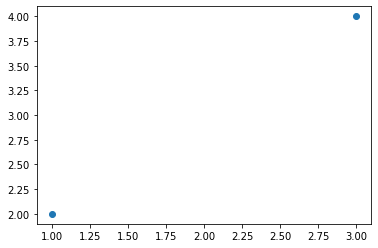

In [51]:
# 绘制点图查看两个点的位置
plt.plot(A[:,0], A[:, 1], 'o')

**线性方程组的矩阵表示**
$$Ax=B$$
$$x=A^{-1}B$$

> 当然，并非所有矩阵都有逆矩阵  
> 满秩的方阵才有逆矩阵

- inverse函数：求解逆矩阵

In [52]:
A = torch.tensor([[1.0, 1], [3, 1]])
A

tensor([[1., 1.],
        [3., 1.]])

In [53]:
B = torch.tensor([2.0, 4])
B

tensor([2., 4.])

In [54]:
# 求解x
torch.mv(torch.inverse(A),B)

tensor([1.0000, 1.0000])

即为$y = x+1$

## 五、矩阵的分解

常见的例如QR分解、LU分解、特征分解、SVD分解等等等等，虽然大多数情况下，矩阵分解都是在形式上将矩阵拆分成几种特殊矩阵的乘积

而大多数情况下，矩阵分解都是分解成形如下述形式      
$$ A = VUD$

### 1.特征分解

$$ A = Q\Lambda Q^{-1}$$

- $Q$和$Q^{-1}$互为逆矩阵，并且Q的列就是A的特征值所对应的特征向量
- $\Lambda$为矩阵A的特征值按照降序排列组成的**对角矩阵**

- `torch.eig()`
- `matrix_rank(B)`


- torch.eig函数：特征分解

In [55]:
A = torch.arange(1, 10).reshape(3, 3).float()
A

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [56]:
torch.eig(A, eigenvectors=True)                
 # 注，此处需要输入参数为True才会返回矩阵的特征向量

g:\py\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:3427.)
  """Entry point for launching an IPython kernel.


torch.return_types.eig(
eigenvalues=tensor([[ 1.6117e+01,  0.0000e+00],
        [-1.1168e+00,  0.0000e+00],
        [ 2.9486e-07,  0.0000e+00]]),
eigenvectors=tensor([[-0.2320, -0.7858,  0.4082],
        [-0.5253, -0.0868, -0.8165],
        [-0.8187,  0.6123,  0.4082]]))

In [57]:
B = torch.tensor([1, 2, 2, 4]).reshape(2, 2).float()
B

tensor([[1., 2.],
        [2., 4.]])

In [58]:
torch.matrix_rank(B)

tensor(1)

In [59]:
torch.eig(B)          # 返回结果中只有一个特征

torch.return_types.eig(
eigenvalues=tensor([[0., 0.],
        [5., 0.]]),
eigenvectors=tensor([]))

In [60]:
C = torch.tensor([[1, 2, 3], [2, 4, 6], [3, 6, 9]]).float()
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [63]:
torch.matrix_rank(C)

tensor(1)

In [61]:
torch.eig(C)               
 # 只有一个特征的有效值

torch.return_types.eig(
eigenvalues=tensor([[ 1.4000e+01,  0.0000e+00],
        [ 6.2356e-08,  0.0000e+00],
        [-2.8243e-07,  0.0000e+00]]),
eigenvectors=tensor([]))

特征值一般用于表示矩阵对应线性方程组解空间以及数据降维，当然，由于特征分解只能作用于方阵，而大多数实际情况下矩阵行列数未必相等，此时要进行类似的操作就需要采用和特征值分解思想类似的奇异值分解（SVD）。

### 2.奇异值分解（SVD）

实际问题中大多数矩阵是以奇异矩阵形式，而不是方阵的形式出现的，奇异值分解是特征值分解在奇异矩阵上的推广形式，它将一个维度为m×n的奇异矩阵A分解成三个部分 :      
$$ A = U\sum V^{T}$$    
其中U、V是两个正交矩阵，其中的每一行（每一列）分别被称为左奇异向量和右奇异向量，他们和∑中对角线上的奇异值相对应，通常情况下我们只需要保留前k个奇异向量和奇异值即可，其中U是m×k矩阵，V是n×k矩阵，∑是k×k的方阵，从而达到减少存储空间的效果，即      
$$ A_{m*n} = U_{m*m}\sum_{m*n}V^{T}_{n*n}\approx U_{m*k}\sum_{k*k}V^{T}_{k*n}$$

- `torch.svd(二维张量)`

- svd奇异值分解函数

In [64]:
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [65]:
torch.svd(C)

#矩阵S 主要的奇异值都集中在一列上

torch.return_types.svd(
U=tensor([[-2.6726e-01,  9.6362e-01, -3.7767e-08],
        [-5.3452e-01, -1.4825e-01, -8.3205e-01],
        [-8.0178e-01, -2.2237e-01,  5.5470e-01]]),
S=tensor([1.4000e+01, 4.2751e-08, 1.6397e-15]),
V=tensor([[-0.2673, -0.9636,  0.0000],
        [-0.5345,  0.1482, -0.8321],
        [-0.8018,  0.2224,  0.5547]]))

In [66]:
CU, CS, CV = torch.svd(C)

验证SVD分解

In [67]:
torch.diag(CS)  # 根据奇异值生成对角矩阵

tensor([[1.4000e+01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.2751e-08, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.6397e-15]])

In [68]:
torch.mm(torch.mm(CU, torch.diag(CS)), CV.t())

# 还原了矩阵C

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

此时我们可根据svd输出结果对C进行降维

此时C可只保留第一列（后面的奇异值过小），即k=1 

In [69]:
U1 = CU[:, 0].reshape(3, 1)         # U的第一列
U1

tensor([[-0.2673],
        [-0.5345],
        [-0.8018]])

In [70]:
C1 = CS[0]                           # C的第一个值
C1

tensor(14.0000)

In [71]:
V1 = CV[:, 0].reshape(1, 3)           # V的第一行
V1

tensor([[-0.2673, -0.5345, -0.8018]])

In [72]:
torch.mm((U1 * C1), V1)

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

此时输出的Cd矩阵已经和原矩阵C高度相似了，损失信息在R的计算中基本可以忽略不计，经过SVD分解，矩阵的信息能够被压缩至更小的空间内进行存储，从而为PCA（主成分分析）、LSI（潜在语义索引）等算法做好了数学工具层面的铺垫。